 ##  Introduction

#### Exploratory Data Analysis (EDA) for Beginners

This notebook walks through a beginner-friendly approach to analyzing the Titanic dataset. We will:
- Load and understand the dataset.
- Perform univariate and bivariate analyses.
- Handle missing data and create new features.



###  Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default styles for plots
sns.set_theme(style="whitegrid")


 ### Step 1: Load the Dataset
We'll load the Titanic dataset to explore its structure and contents.


In [28]:
# Load the Titanic dataset
# df = pd.read_csv('/kaggle/input/titanic/titanic.csv')
df=sns.load_dataset('titanic')
# Display the first few rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


The dataset contains columns such as:
- `PassengerId`: Unique identifier for each passenger.
- `Survived`: Survival status (1 = Survived, 0 = Did not survive).
- `Pclass`: Passenger class (1 = First, 2 = Second, 3 = Third).
- `Name`, `Sex`, `Age`: Personal details.


## Step 2: Dataset Overview
Let's understand the dataset's structure, dimensions, and any missing values.


In [29]:
# Dataset dimensions
print(f"Number of rows and columns: {df.shape}")

# Summary of data types and non-null values
df.info()

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Number of rows and columns: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Missing Values:

survived         0
pcla

- The dataset has `891` rows and `15` columns.
- Key columns like `Age` and `Cabin` have missing values, which we will handle later.


## Step 3: Univariate Analysis
We'll analyze individual features to understand their distributions.


* > * Categorical (e.g., Sex):



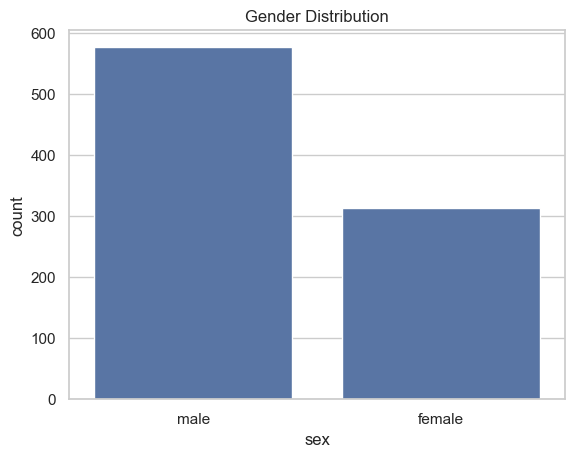

In [30]:
# Gender distribution
sns.countplot(data=df, x='sex')
plt.title("Gender Distribution")
plt.show()


* > * Numerical (e.g., Age):



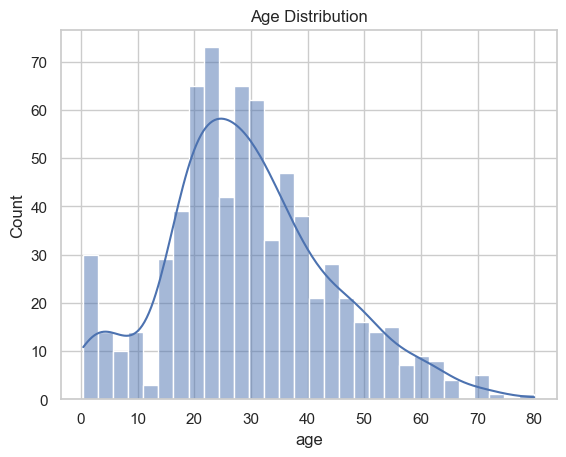

In [31]:
# Age distribution
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()


## Step 4: Bivariate Analysis
Let's explore relationships between two variables, such as `Survived` and `Sex`.


* > * Survival by Gender:



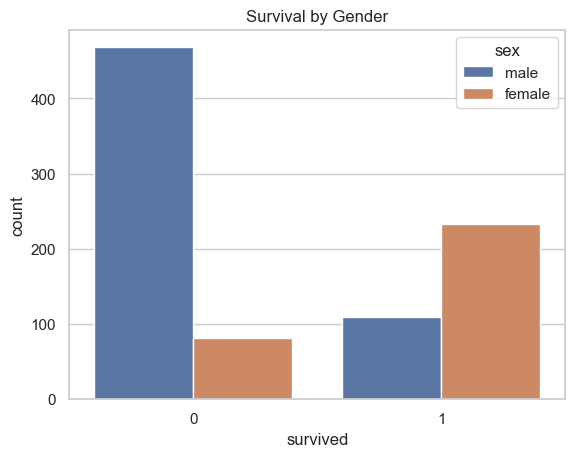

In [32]:
sns.countplot(data=df, x='survived', hue='sex')
plt.title("Survival by Gender")
plt.show()


* > * Survival by Class::



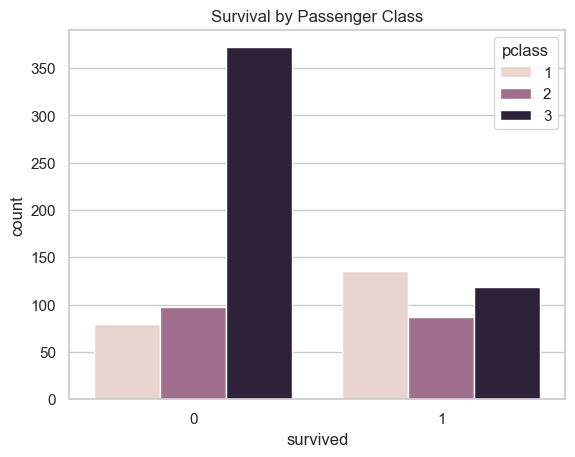

In [33]:
sns.countplot(data=df, x='survived', hue='pclass')
plt.title("Survival by Passenger Class")
plt.show()


### Insights
- Female passengers had a higher survival rate compared to males.
- Passengers in higher classes (`1st`) had better survival rates.


## Step 5: Handling Missing Data
We'll handle missing values in columns like `Age` and `Embarked`.


In [34]:
# Display the columns in the dataset
print(df.columns)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [35]:
# Fill missing Age with the median (without using inplace=True)
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing Embarked with the most common value (without using inplace=True)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])



Missing values in `Age` and `Embarked` have been successfully handled.


## Step 6: Feature Engineering
Let's create new features like `FamilySize` and `AgeGroup`.


In [36]:
# Create FamilySize
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

# Create AgeGroup
df['AgeGroup'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 80], 
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])


## Step 7: Correlation Analysis
Analyzing relationships between numerical variables using a correlation matrix.


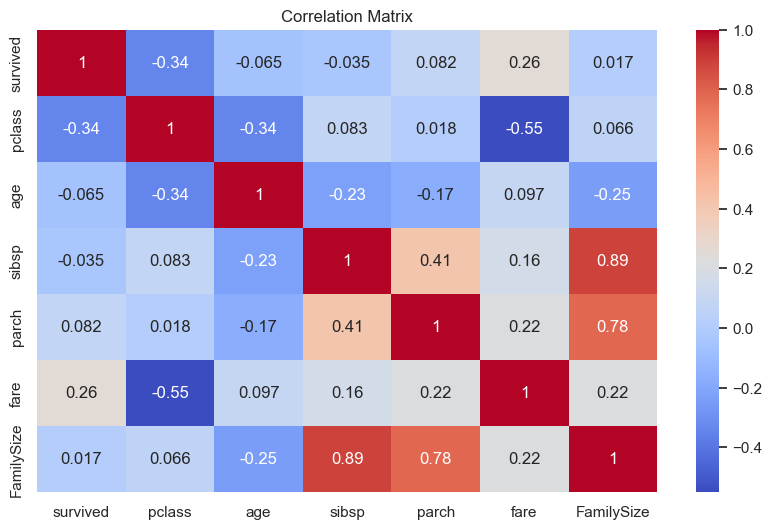

In [37]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=[np.number])

# Plot the correlation matrix for numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Conclusion
- Female and first-class passengers had better survival rates.
- Family size and age group also influenced survival.
- The dataset has been cleaned and enhanced for further analysis.
